클러스터링
==
데이터
--
#### 2020/ 04 / 30 keonwooPark
#### 세계평균기온 클러스터링(데이터는 R로 전처리 실시함)

필요한 라이브러리(모듈) 설치
--

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

데이터 읽기
--

In [38]:
power_data = pd.read_excel('세계평균기온.xlsx')
print(power_data.shape)

(12, 13)


In [76]:
power_data

,나라,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,프랑스,4.1,6.9,9.3,11.5,13.5,19.8,22.5,21.0,17.1,13.2,7.8,6.7
1,체코,-0.6,2.5,6.5,9.8,11.0,21.4,19.9,19.5,14.2,9.8,5.4,2.4
2,루마니아,-1.3,3.2,8.9,11.0,16.6,22.6,22.0,23.4,18.4,12.3,9.5,3.4
3,그리스,9.4,10.3,13.8,15.6,19.9,26.5,28.1,29.4,25.0,21.6,18.1,12.4
4,한국,-0.9,1.1,7.1,12.2,19.5,22.5,25.9,27.1,22.6,16.3,7.5,1.3
5,말레이시아,28.2,28.6,29.0,28.7,28.9,28.4,28.4,28.3,28.5,27.0,27.4,27.4
6,이집트,13.9,15.8,17.7,21.1,27.4,29.6,30.2,30.4,28.0,25.6,22.3,16.4
7,가나,29.2,29.4,29.5,29.4,28.2,27.0,26.2,25.8,26.6,27.0,28.6,29.1
8,캐나다,-11.4,-9.0,-3.7,4.7,11.4,17.5,22.7,19.7,15.3,8.9,-1.6,-4.9
9,미국,0.9,2.0,4.8,11.9,16.2,22.4,27.3,24.9,22.1,16.0,7.2,4.0


In [40]:
power = power_data.set_index('나라')

In [41]:
power.head()

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
나라,,,,,,,,,,,,
프랑스,4.1,6.9,9.3,11.5,13.5,19.8,22.5,21.0,17.1,13.2,7.8,6.7
체코,-0.6,2.5,6.5,9.8,11.0,21.4,19.9,19.5,14.2,9.8,5.4,2.4
루마니아,-1.3,3.2,8.9,11.0,16.6,22.6,22.0,23.4,18.4,12.3,9.5,3.4
그리스,9.4,10.3,13.8,15.6,19.9,26.5,28.1,29.4,25.0,21.6,18.1,12.4
한국,-0.9,1.1,7.1,12.2,19.5,22.5,25.9,27.1,22.6,16.3,7.5,1.3


한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [42]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [444]:
#power = power.drop(['AAR','ABL','ESR','JJA','JNA','KAL','TWB','ASV','CES','CQH','FGW','JAL'])

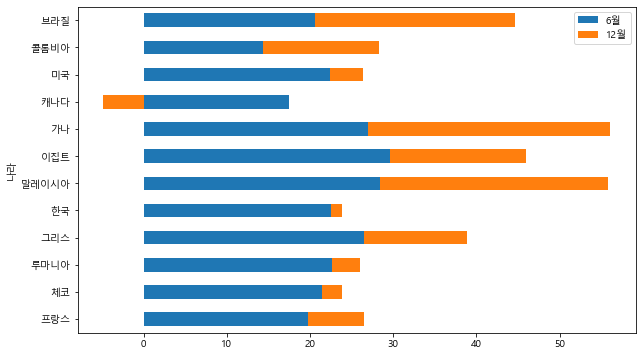

In [43]:
see2 = [ '6월','12월']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [44]:
power = power[['6월','12월']]
power.head(5)

,6월,12월
나라,,
프랑스,19.8,6.7
체코,21.4,2.4
루마니아,22.6,3.4
그리스,26.5,12.4
한국,22.5,1.3


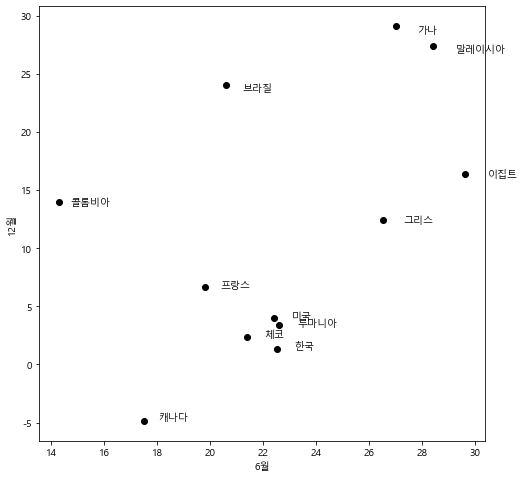

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(power['6월'], power['12월'],c='k',marker='o')
plt.xlabel('6월')
plt.ylabel('12월')

for n in range(power.shape[0]):
    plt.text(power['6월'][n]*1.03, power['12월'][n]*0.98, power.index[n])

스캐터 플롯
--

덴드로그램
--


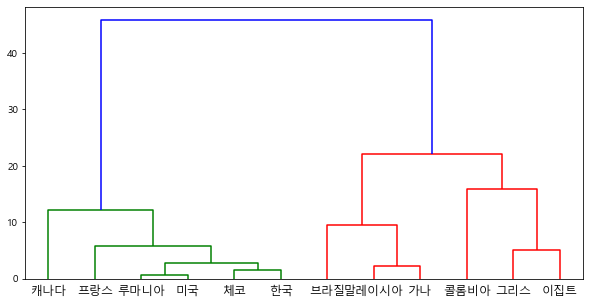

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')  
dendrogram(link_dist, labels=power.index)
plt.show()

클러스터링 (KMeans)
--

In [47]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=3).fit(power)
print(k.n_clusters)

3


In [48]:
power['클러스터'] = k.labels_
power.head(10)


,6월,12월,클러스터
나라,,,
프랑스,19.8,6.7,1
체코,21.4,2.4,1
루마니아,22.6,3.4,1
그리스,26.5,12.4,2
한국,22.5,1.3,1
말레이시아,28.4,27.4,0
이집트,29.6,16.4,2
가나,27.0,29.1,0
캐나다,17.5,-4.9,1


In [49]:
power.drop('클러스터', axis = 1, inplace=True) ; power.head()

,6월,12월
나라,,
프랑스,19.8,6.7
체코,21.4,2.4
루마니아,22.6,3.4
그리스,26.5,12.4
한국,22.5,1.3


In [50]:
centers = k.cluster_centers_ ; centers

array([[25.33333333, 26.83333333],
       [21.03333333,  2.15      ],
       [23.46666667, 14.26666667]])

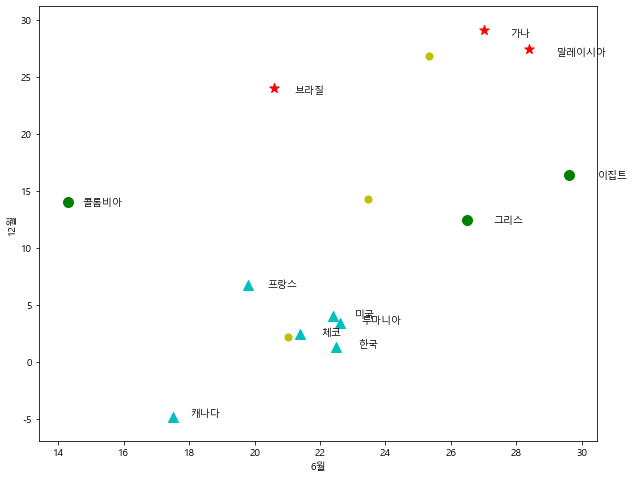

In [51]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('6월')
plt.ylabel('12월')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['6월'][n], power['12월'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['6월'][n]*1.03, power['12월'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'y', s= 50)

스케일링 (표준 정규화)
--

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
power[['6월', '12월']] = scaler.fit_transform(power[['6월', '12월']])
power

,6월,12월
나라,,
프랑스,-0.673162,-0.438353
체코,-0.303884,-0.843711
루마니아,-0.026926,-0.749442
그리스,0.873187,0.098983
한국,-0.050006,-0.947407
말레이시아,1.311703,1.513024
이집트,1.588661,0.476060
가나,0.988586,1.673282
캐나다,-1.203998,-1.531877


정규화 이후의 클러스터링
--

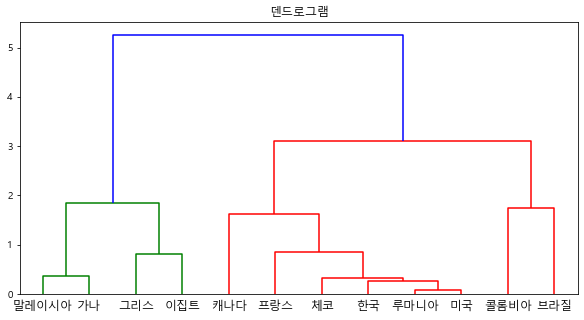

In [53]:
Z = linkage(power, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)
plt.show()

In [54]:
k = KMeans(n_clusters= 4).fit(power)

In [55]:
centers = k.cluster_centers_

<Figure size 432x288 with 0 Axes>

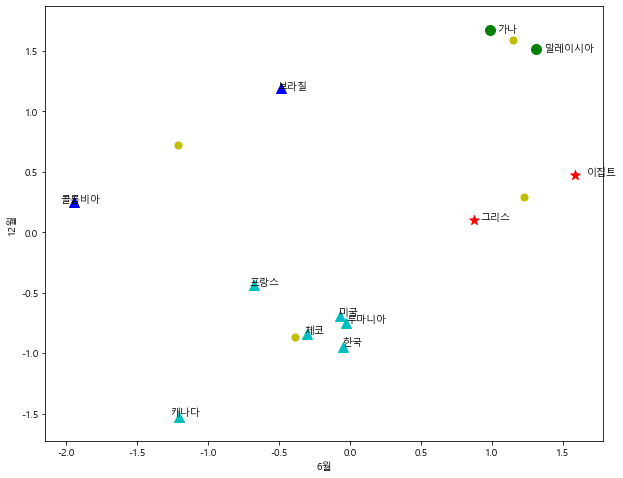

In [56]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('6월')
plt.ylabel('12월')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['6월'][n], power['12월'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['6월'][n]*1.05, power['12월'][n]*0.99, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'y', s= 50)

모든 특성을 고려한 크러스터링 (두개가 아니라)
--

In [57]:
power_data.head()

,나라,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,프랑스,4.1,6.9,9.3,11.5,13.5,19.8,22.5,21.0,17.1,13.2,7.8,6.7
1,체코,-0.6,2.5,6.5,9.8,11.0,21.4,19.9,19.5,14.2,9.8,5.4,2.4
2,루마니아,-1.3,3.2,8.9,11.0,16.6,22.6,22.0,23.4,18.4,12.3,9.5,3.4
3,그리스,9.4,10.3,13.8,15.6,19.9,26.5,28.1,29.4,25.0,21.6,18.1,12.4
4,한국,-0.9,1.1,7.1,12.2,19.5,22.5,25.9,27.1,22.6,16.3,7.5,1.3


In [58]:
power2 = power_data.set_index('나라')
#power2 = power2.drop(['AAR','ABL','ESR','JJA','JNA','KAL','TWB','ASV','CES','CQH','FGW','JAL'])
#power2.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
 #          inplace=True, errors='ignore')
#power2.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [59]:
power2.head()

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
나라,,,,,,,,,,,,
프랑스,4.1,6.9,9.3,11.5,13.5,19.8,22.5,21.0,17.1,13.2,7.8,6.7
체코,-0.6,2.5,6.5,9.8,11.0,21.4,19.9,19.5,14.2,9.8,5.4,2.4
루마니아,-1.3,3.2,8.9,11.0,16.6,22.6,22.0,23.4,18.4,12.3,9.5,3.4
그리스,9.4,10.3,13.8,15.6,19.9,26.5,28.1,29.4,25.0,21.6,18.1,12.4
한국,-0.9,1.1,7.1,12.2,19.5,22.5,25.9,27.1,22.6,16.3,7.5,1.3


In [60]:
index_power = power2.index
column_power = power2.columns
manufacture = list(column_power).index('6월')
service = list(column_power).index('12월')

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 이제 power3는 ndarray이다
power3 = scaler.fit_transform(power2)

In [62]:
type(power3);type(power2)

pandas.core.frame.DataFrame

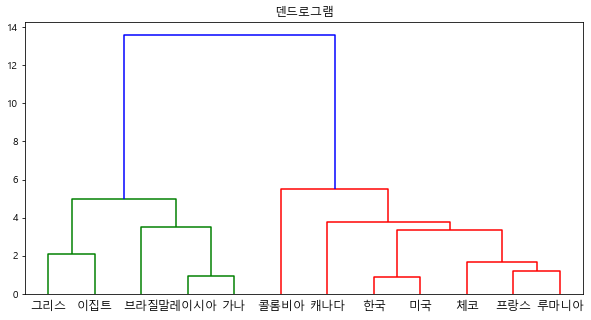

In [63]:
Z = linkage(power3, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=index_power)
plt.show()

In [74]:
k = KMeans(n_clusters=4).fit(power3)

12


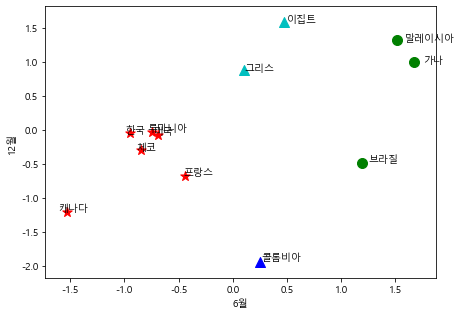

In [78]:
n_samples = power3.shape[0]
print(n_samples)

plt.figure(figsize=(7, 5))
plt.xlabel('6월')
plt.ylabel('12월')

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power3[n][service], power3[n][manufacture], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power3[n][service]*1.05, power3[n][manufacture]*0.99, index_power[n])

## DBSCAN

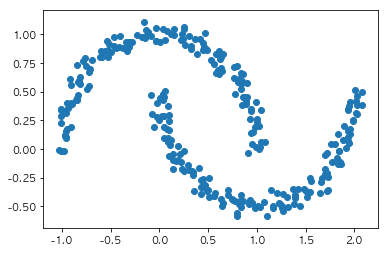

In [224]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=300, noise=0.05, random_state=11)
plt.scatter(X[:,0], X[:,1])
plt.show()

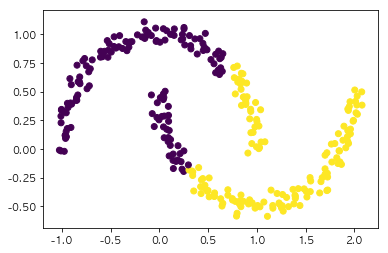

In [225]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

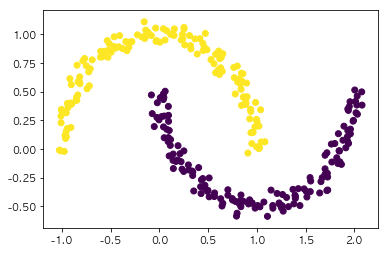

In [226]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)